In [220]:
#트위터 크롤링 TXT
import datetime 
from twitterscraper.query import query_tweets 

keyword = '코로나' 
f = open('c:/data/twitter/twitter_22w.txt',mode='w',encoding='utf-8') 
list_of_tweets = query_tweets(keyword,
                              begindate=datetime.date(2020,5,25),
                              enddate=datetime.date(2020,5,31))

for tweet in list_of_tweets:
    f.write(str(tweet.text)+'\n')
f.close()

INFO: queries: ['코로나 since:2020-05-25 until:2020-05-26', '코로나 since:2020-05-26 until:2020-05-27', '코로나 since:2020-05-27 until:2020-05-28', '코로나 since:2020-05-28 until:2020-05-29', '코로나 since:2020-05-29 until:2020-05-30', '코로나 since:2020-05-30 until:2020-05-31']
INFO: Got 20 tweets (20 new).
INFO: Got 39 tweets (19 new).
INFO: Got 58 tweets (19 new).
INFO: Got 77 tweets (19 new).
INFO: Got 95 tweets (18 new).
INFO: Got 113 tweets (18 new).


In [1]:
from konlpy.tag import Hannanum
import pandas as pd
def flatten(items): #2차원 리스트를 1차원 리스트로 변환
        flatList=[]
        for elem in items:
            if type(elem) == list: #자료형이 리스트이면
                for e in elem: #개별 원소를 추가
                    flatList.append(e)
            else: #리스트가 아니면 그대로 추가
                flatList.append(elem)
        return flatList

In [160]:
from tqdm import tqdm_notebook
f=open('c:/data/twitter/twitter_4m.txt', encoding='utf-8')
lines = f.readlines() 
f.close()

han=Hannanum() #한나눔 패키지
temp=[]
for j in tqdm_notebook(range(len(lines))):
    a=lines[j].strip() #공백,줄바꿈,탭 제거
    temp.append(han.nouns(a))

word_list1 = flatten(temp) # 리스트 2차원에서 1차원
word_list2 = [x for x in word_list1 if len(x)>1] # 2글자 이상인 요소만
word_list3 = [i for i in word_list2 if i not in stopwords] # 특정 단어 제외
word_list4 = pd.Series(word_list3) # 시리즈 타입으로 변경해야 value_counts 가능
word_list5 = word_list4.value_counts().head(50) # 빈도수 상위 50개
word_list6 = list(word_list5.index) # 빈도수 상위 단어 리스트로 묶음

In [161]:
word_list6

['코로나19',
 '일본',
 '사태',
 '코로나',
 '한국',
 '미국',
 '우리',
 '대응',
 '정부',
 '확진자',
 '다음뉴스',
 '대구',
 '사람',
 '대통령',
 '때문',
 '환자',
 '마스크',
 '세계',
 '다음',
 '총선',
 '현황',
 '사망자',
 '바이러스',
 '생각',
 '중국',
 '진짜',
 '이후',
 '극복',
 '#코로',
 '주세요',
 '검사',
 '감염',
 '사람들',
 '필요',
 '관련',
 '나라',
 '방역',
 '사회적',
 '대한민국',
 '대처',
 '지금',
 '보령시',
 '전세계',
 '문재',
 '진단키트',
 '기준',
 '지원',
 '공유',
 '거리두',
 '경기']

In [ ]:
['코로나19', '일본', '사태', '코로나', '한국', '미국', '우리', '대응', '정부', '확진자', '다음뉴스', '대구', '사람', '대통령', '때문', '환자', '마스크', '세계','다음', '총선','현황', '사망자',
 '바이러스', '생각', '중국', '진짜', '이후', '극복', '#코로', '주세요', '검사', '감염', '사람들', '필요', '관련', '나라', '방역', '사회적', '대한민국', '대처', '지금', '보령시', '전세계', '문재',
 '진단키트', '기준','지원', '공유', '거리두', '경기']

In [164]:
# 일단 각 주차별 word_list6를 확인하고 words_choice를 확정.
words_choice = ['우한', '중국', '폐렴', '홍콩', '마스크', '미국', '메르스','중국', '신천지', '정부', '일본', '대구', '백신', '마스크', '미국', '예배'
 ,'신천지', '정부', '미국', '일본', '마스크' , '대구', '진단키트','교회', '경제', '유럽', '미국', '마스크', '중국', '일본', '신천지', '의료진', '대구']

In [166]:
words_choice = list(set(words_choice))

In [167]:
words_choice

['교회',
 '백신',
 '유럽',
 '진단키트',
 '우한',
 '일본',
 '신천지',
 '중국',
 '마스크',
 '예배',
 '경제',
 '메르스',
 '미국',
 '대구',
 '홍콩',
 '의료진',
 '정부',
 '폐렴']

In [224]:
array = list(range(23)[1:])
array

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [225]:
from tqdm import tqdm_notebook
temp_re=[]
for i in range(23)[1:]:
    f=open(f'c:/data/twitter/twitter_{i}w.txt', encoding='utf-8')
    lines = f.readlines() 
    f.close()

    han=Hannanum() #한나눔 패키지
    temp=[]
    for j in tqdm_notebook(range(len(lines))):
        a=lines[j].strip() #공백,줄바꿈,탭 제거
        b = han.nouns(a)
        c = list(filter(lambda x : x in words_choice, b))
        if len(c) != 0:
            temp.append(c)
        else:
            pass
    temp_re.append(flatten(temp))

In [232]:
temp_re[3]

['폐렴',
 '백신',
 '메르스',
 '마스크',
 '경제',
 '폐렴',
 '우한',
 '중국',
 '중국',
 '일본',
 '폐렴',
 '백신',
 '메르스',
 '마스크',
 '경제',
 '폐렴',
 '우한',
 '중국',
 '중국',
 '일본',
 '중국',
 '중국',
 '우한',
 '폐렴',
 '중국',
 '우한',
 '폐렴',
 '폐렴',
 '우한',
 '폐렴',
 '우한',
 '중국',
 '폐렴',
 '우한',
 '중국',
 '우한',
 '폐렴',
 '우한',
 '폐렴',
 '우한',
 '우한',
 '폐렴',
 '폐렴',
 '중국',
 '우한',
 '폐렴',
 '중국',
 '중국',
 '폐렴',
 '폐렴',
 '메르스',
 '중국',
 '중국',
 '중국',
 '폐렴',
 '메르스',
 '폐렴',
 '일본',
 '우한',
 '중국',
 '폐렴',
 '중국',
 '폐렴',
 '중국',
 '폐렴',
 '중국',
 '폐렴',
 '우한',
 '우한',
 '중국',
 '중국',
 '중국',
 '중국',
 '메르스',
 '우한',
 '폐렴',
 '중국',
 '중국',
 '메르스',
 '메르스',
 '메르스',
 '폐렴',
 '우한',
 '미국',
 '중국',
 '중국',
 '마스크',
 '우한',
 '폐렴',
 '중국',
 '우한',
 '우한',
 '우한',
 '우한',
 '일본',
 '일본',
 '미국',
 '메르스',
 '메르스',
 '우한',
 '미국',
 '중국',
 '중국',
 '마스크',
 '우한',
 '폐렴',
 '중국',
 '우한',
 '우한',
 '우한',
 '우한',
 '일본',
 '일본',
 '미국',
 '메르스',
 '메르스',
 '중국',
 '홍콩',
 '중국',
 '중국',
 '미국',
 '우한',
 '미국',
 '중국',
 '정부',
 '중국',
 '미국',
 '중국',
 '일본',
 '중국',
 '중국',
 '백신',
 '메르스',
 '마스크',
 '경제',
 '마스크',
 '중국',
 '일본',
 '우한',
 '폐렴',
 

In [233]:
docs = temp_re
vocab = words_choice

In [234]:
from math import log
N=len(docs) #문서의 갯수

# tf - 문서 내에서 단어의 출현 횟수
def tf(t,d):
    return d.count(t)

# df : 특정 단어가 등장한 문서의 수
# idf : df에 반비례하는 수
def idf(t):
    df=0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

# tfidf : tf와 idf를 곱한 값
def tfidf(t,d):
    return tf(t,d) * idf(t)

In [235]:
import pandas as pd
result=[]
for i in range(N):
    result.append([])
    d=docs[i] #i번째 문서
    for j in range(len(vocab)): 
        t=vocab[j]#개별 단어
        result[-1].append(tf(t,d)) #tf 추가 추가

print(result)
df_tf=pd.DataFrame(result, columns=vocab)
df_tf

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 10, 0, 0, 29, 5, 0, 0, 12, 0, 0, 13, 5, 0, 50], [0, 2, 0, 0, 4, 12, 0, 13, 0, 0, 0, 1, 0, 0, 0, 0, 2, 10], [1, 69, 17, 0, 548, 86, 0, 616, 254, 0, 12, 96, 66, 0, 53, 23, 86, 318], [11, 65, 7, 6, 350, 109, 0, 536, 463, 14, 27, 64, 157, 11, 23, 14, 195, 204], [1, 0, 0, 0, 2, 1, 0, 8, 9, 0, 1, 0, 2, 0, 2, 1, 4, 1], [0, 3, 1, 0, 2, 14, 1, 14, 5, 0, 2, 0, 2, 0, 0, 0, 6, 0], [2, 0, 0, 0, 1, 6, 13, 7, 3, 2, 4, 1, 0, 11, 0, 2, 8, 0], [0, 2, 1, 1, 0, 3, 12, 6, 5, 1, 1, 2, 2, 5, 0, 0, 1, 1], [0, 2, 1, 0, 0, 3, 15, 0, 6, 0, 0, 0, 1, 7, 0, 1, 1, 0], [2, 0, 2, 5, 0, 6, 4, 3, 8, 0, 3, 1, 4, 7, 0, 2, 8, 0], [1, 3, 3, 1, 1, 1, 2, 0, 6, 0, 0, 0, 5, 1, 2, 1, 4, 1], [2, 0, 2, 6, 0, 4, 2, 1, 3, 1, 0, 1, 12, 2, 0, 0, 9, 0], [0, 2, 0, 0, 0, 2, 3, 2, 1, 0, 2, 1, 5, 8, 0, 1, 5, 0], [0, 2, 0, 2, 0, 6, 0, 1, 6, 1, 2, 0, 4, 6, 0, 2, 7, 0], [1, 1, 0, 1, 2, 9, 2, 5, 5, 0, 1, 0, 4, 5, 0, 0, 4, 0], [0, 1, 1, 2, 0, 7, 1, 2, 1, 0, 3, 0, 5, 2, 0, 3, 

,교회,백신,유럽,진단키트,우한,일본,신천지,중국,마스크,예배,경제,메르스,미국,대구,홍콩,의료진,정부,폐렴
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,10,0,0,29,5,0,0,12,0,0,13,5,0,50
2,0,2,0,0,4,12,0,13,0,0,0,1,0,0,0,0,2,10
3,1,69,17,0,548,86,0,616,254,0,12,96,66,0,53,23,86,318
4,11,65,7,6,350,109,0,536,463,14,27,64,157,11,23,14,195,204
5,1,0,0,0,2,1,0,8,9,0,1,0,2,0,2,1,4,1
6,0,3,1,0,2,14,1,14,5,0,2,0,2,0,0,0,6,0
7,2,0,0,0,1,6,13,7,3,2,4,1,0,11,0,2,8,0
8,0,2,1,1,0,3,12,6,5,1,1,2,2,5,0,0,1,1
9,0,2,1,0,0,3,15,0,6,0,0,0,1,7,0,1,1,0


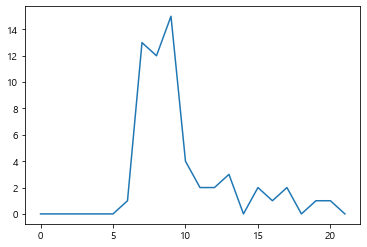

In [236]:
plt.plot(df_tf['신천지'])
plt.show()

In [237]:
#idf 계산
result=[]
for j in range(len(vocab)):
    t=vocab[j]
    result.append(idf(t))

df_idf=pd.DataFrame(result,index=vocab, columns=['IDF'])
df_idf.sort_values(by=['IDF'], axis=0, ascending=False)

,IDF
예배,1.145132
홍콩,1.145132
폐렴,1.011601
진단키트,0.788457
메르스,0.693147
교회,0.693147
우한,0.606136
유럽,0.606136
신천지,0.451985
대구,0.451985


In [238]:
#tfidf 계산- 값이 크면 중요도가 높고 값이 작으면 중요도가 낮은 단어
from tqdm import tqdm_notebook

result=[]
for i in tqdm_notebook(range(N)):
    result.append([])
    d=docs[i]
    for j in range(len(vocab)):
        t=vocab[j]
        result[-1].append(tfidf(t,d))
        
df_tfidf=pd.DataFrame(result, columns=vocab)        
df_tfidf

,교회,백신,유럽,진단키트,우한,일본,신천지,중국,마스크,예배,경제,메르스,미국,대구,홍콩,의료진,정부,폐렴
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.273815,0.000000,0.000000,6.061358,0.000000,0.000000,2.763995,0.476551,0.000000,0.000000,8.317766,0.000000,0.000000,14.886720,1.914961,0.000000,50.580046
2,0.000000,0.636907,0.000000,0.000000,2.424543,0.558240,0.000000,1.239032,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.093040,10.116009
3,0.693147,21.973307,10.304309,0.000000,332.162420,4.000721,0.000000,58.711071,24.208786,0.000000,3.821445,66.542129,9.675829,0.000000,60.692012,8.808822,4.000721,321.689090
4,7.624619,20.699493,4.242951,4.730744,212.147531,5.070682,0.000000,51.086256,44.128613,16.031852,8.598251,44.361420,23.016745,4.971836,26.338043,5.361892,9.071403,206.366586
5,0.693147,0.000000,0.000000,0.000000,1.212272,0.046520,0.000000,0.762481,0.857792,0.000000,0.318454,0.000000,0.293207,0.000000,2.290265,0.382992,0.186080,1.011601
6,0.000000,0.955361,0.606136,0.000000,1.212272,0.651280,0.451985,1.334343,0.476551,0.000000,0.636907,0.000000,0.293207,0.000000,0.000000,0.000000,0.279120,0.000000
7,1.386294,0.000000,0.000000,0.000000,0.606136,0.279120,5.875807,0.667171,0.285931,2.290265,1.273815,0.693147,0.000000,4.971836,0.000000,0.765985,0.372160,0.000000
8,0.000000,0.636907,0.606136,0.788457,0.000000,0.139560,5.423821,0.571861,0.476551,1.145132,0.318454,1.386294,0.293207,2.259926,0.000000,0.000000,0.046520,1.011601
9,0.000000,0.636907,0.606136,0.000000,0.000000,0.139560,6.779777,0.000000,0.571861,0.000000,0.000000,0.000000,0.146603,3.163896,0.000000,0.382992,0.046520,0.000000


# 1~22주차 키워드 그래프

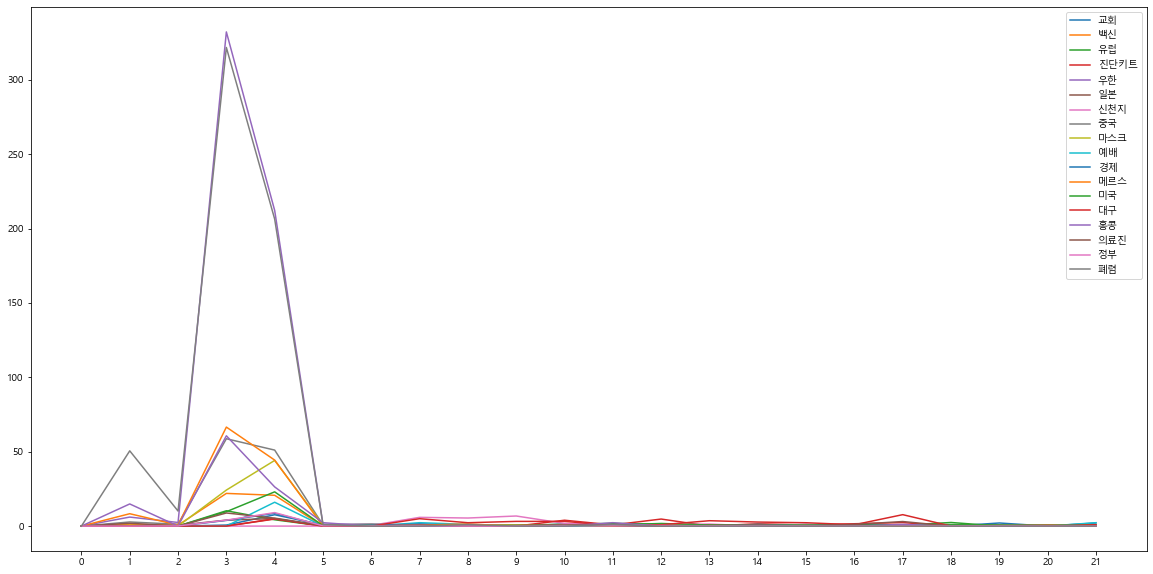

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 10)
plt.figure(figsize=(20,10))
plt.plot(df_tfidf)
plt.xticks(df_tfidf.index)
plt.legend(df_tfidf.columns, loc='upper right')
plt.show()

In [241]:
df_tfidf.columns

Index(['교회', '백신', '유럽', '진단키트', '우한', '일본', '신천지', '중국', '마스크', '예배', '경제',
       '메르스', '미국', '대구', '홍콩', '의료진', '정부', '폐렴'],
      dtype='object')

In [268]:
df = df_tfidf.iloc[5:,:]
df

,교회,백신,유럽,진단키트,우한,일본,신천지,중국,마스크,예배,경제,메르스,미국,대구,홍콩,의료진,정부,폐렴
5,0.693147,0.000000,0.000000,0.000000,1.212272,0.04652,0.000000,0.762481,0.857792,0.000000,0.318454,0.000000,0.293207,0.000000,2.290265,0.382992,0.18608,1.011601
6,0.000000,0.955361,0.606136,0.000000,1.212272,0.65128,0.451985,1.334343,0.476551,0.000000,0.636907,0.000000,0.293207,0.000000,0.000000,0.000000,0.27912,0.000000
7,1.386294,0.000000,0.000000,0.000000,0.606136,0.27912,5.875807,0.667171,0.285931,2.290265,1.273815,0.693147,0.000000,4.971836,0.000000,0.765985,0.37216,0.000000
8,0.000000,0.636907,0.606136,0.788457,0.000000,0.13956,5.423821,0.571861,0.476551,1.145132,0.318454,1.386294,0.293207,2.259926,0.000000,0.000000,0.04652,1.011601
9,0.000000,0.636907,0.606136,0.000000,0.000000,0.13956,6.779777,0.000000,0.571861,0.000000,0.000000,0.000000,0.146603,3.163896,0.000000,0.382992,0.04652,0.000000
10,1.386294,0.000000,1.212272,3.942287,0.000000,0.27912,1.807940,0.285931,0.762481,0.000000,0.955361,0.693147,0.586414,3.163896,0.000000,0.765985,0.37216,0.000000
11,0.693147,0.955361,1.818407,0.788457,0.606136,0.04652,0.903970,0.000000,0.571861,0.000000,0.000000,0.000000,0.733017,0.451985,2.290265,0.382992,0.18608,1.011601
12,1.386294,0.000000,1.212272,4.730744,0.000000,0.18608,0.903970,0.095310,0.285931,1.145132,0.000000,0.693147,1.759242,0.903970,0.000000,0.000000,0.41868,0.000000
13,0.000000,0.636907,0.000000,0.000000,0.000000,0.09304,1.355955,0.190620,0.095310,0.000000,0.636907,0.693147,0.733017,3.615881,0.000000,0.382992,0.23260,0.000000
14,0.000000,0.636907,0.000000,1.576915,0.000000,0.27912,0.000000,0.095310,0.571861,1.145132,0.636907,0.000000,0.586414,2.711911,0.000000,0.765985,0.32564,0.000000


# 5~20주차별 키워드 그래프

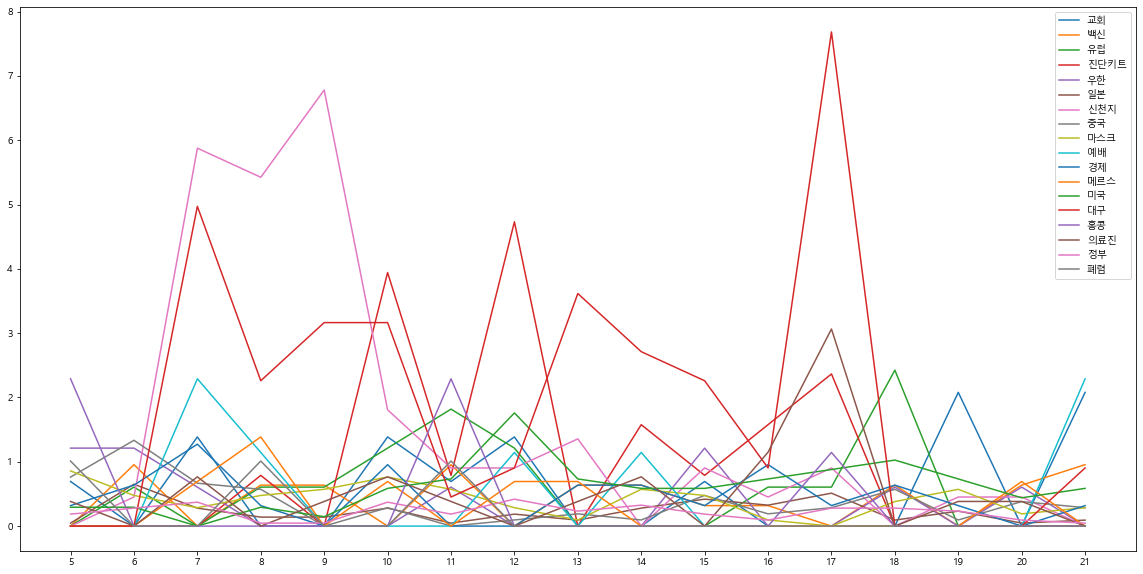

In [269]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 10)
plt.figure(figsize=(20,10))
plt.plot(df)
plt.xticks(df.index)
plt.legend(df.columns, loc='upper right')
plt.show()

# 5~22주차 키워드 묶음 그래프

In [279]:
df_1 = df[['유럽','일본','중국','미국','홍콩']]
df_2 = df[['신천지','대구','예배']]
df_3 = df[['의료진','정부','진단키트']]
df_4 = df[['마스크','경제']]
df_1['국제'] = df_1.sum(axis=1)
df_2['종교'] = df_2.sum(axis=1)
df_3['의료'] = df_3.sum(axis=1)
df_4['시장'] = df_4.sum(axis=1)

C:\Users\analysis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\analysis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\analysis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

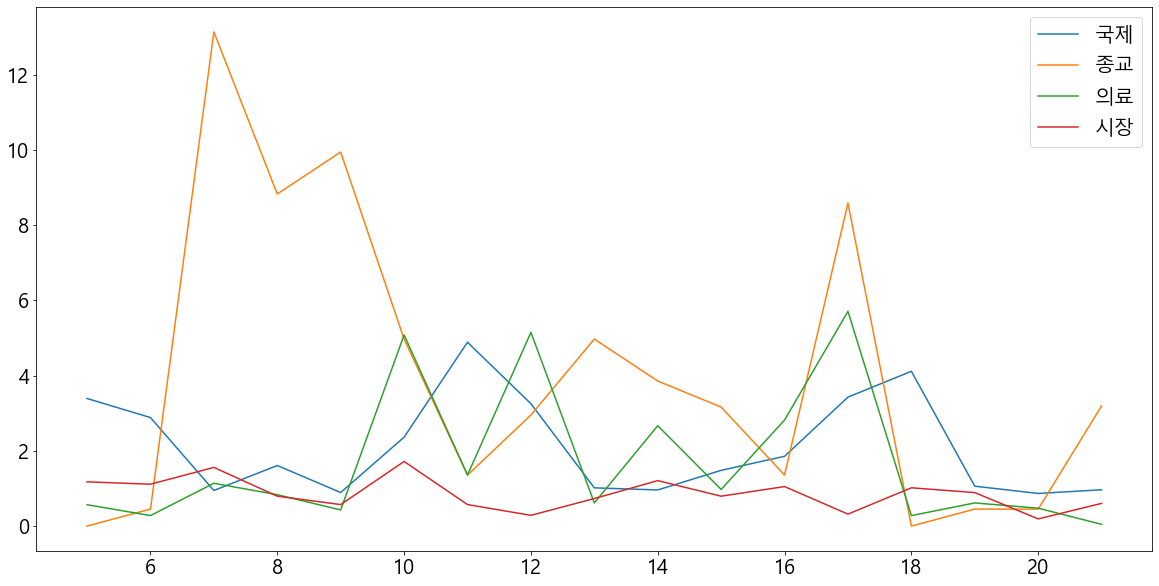

In [290]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(20,10))
plt.plot(df_1['국제'], label='국제')
plt.plot(df_2['종교'], label='종교')
plt.plot(df_3['의료'], label='의료')
plt.plot(df_4['시장'], label='시장')
plt.legend()
plt.show()

# 5월 1~5주차 키워드 그래프

C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


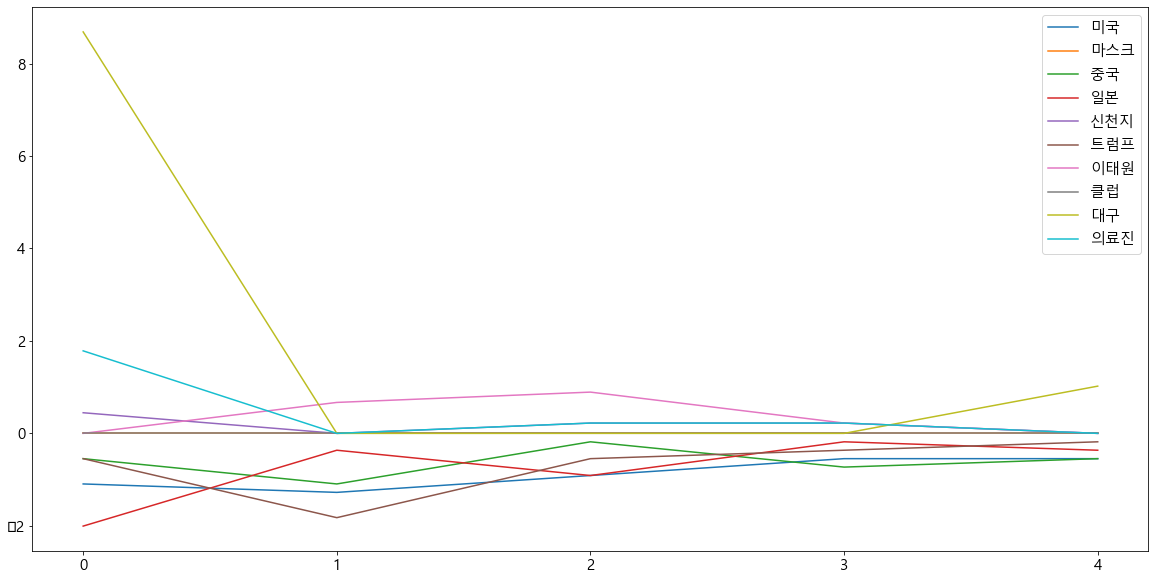

In [138]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name, size = 15)
# plt.figure(figsize=(20,10))
# plt.plot(df_tfidf)
# plt.xticks(df_tfidf.index)
# plt.legend(df_tfidf.columns)
# plt.show()

# 1~5월 키워드 그래프

C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\analysis\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


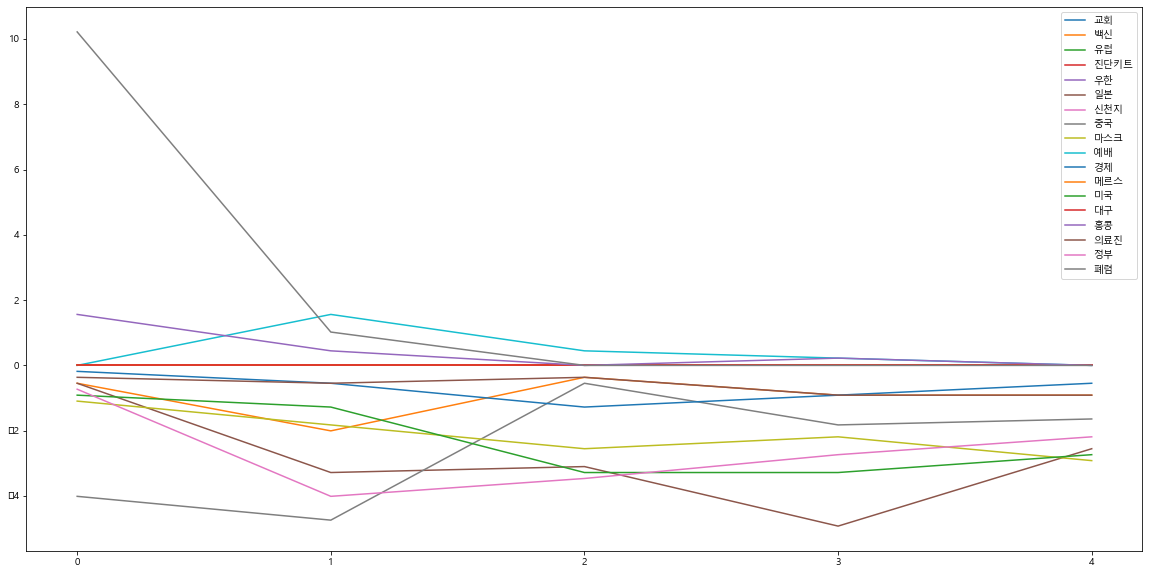

In [189]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name, size = 10)
# plt.figure(figsize=(20,10))
# plt.plot(df_tfidf)
# plt.xticks(df_tfidf.index)
# plt.legend(df_tfidf.columns, loc='upper right')
# plt.show()

- 문서의 개수가 작다보니까 log 값이 0 근처에 머물고 그래서 TF X IDF 가 유의한 추이를 보여주기 어려웠음
- 각 트위트 별로 그래프를 만들었을때는 x값이 4000개씩 있어서 너무 많다 싶어서 주차별, 월별로 줄였는데 너무 줄인 것 같음
- 1~5월 주차별로 해봐야겠음